<a href="https://colab.research.google.com/github/skasana/tesla-stock-price-prediction-using-facebook-prophet-/blob/main/forecasting_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import prophet
from prophet import Prophet

In [2]:
import plotly.io as pio
pio.renderers.default='colab'

In [3]:
df= pd.read_csv("/content/TSLA.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
1,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
3,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
4,2021-07-12,662.200012,687.239990,662.159973,685.700012,685.700012,25927000
...,...,...,...,...,...,...,...
246,2022-06-27,748.099976,756.210022,727.700012,734.760010,734.760010,29726100
247,2022-06-28,733.450012,749.909973,697.030029,697.989990,697.989990,30130400
248,2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400
249,2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,868.191952,888.561551,845.794981,866.985375,866.985375,2.546814e+07
std,160.510480,165.062981,153.717128,159.428178,159.428178,9.007302e+06
min,623.849976,647.200012,620.460022,628.159973,628.159973,9.800600e+06
25%,723.480011,740.734985,708.889984,723.309998,723.309998,1.901000e+07
50%,851.450012,869.489990,825.159973,846.349976,846.349976,2.430100e+07
75%,1007.399994,1034.894959,984.920013,1009.825012,1009.825012,3.043895e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [7]:
px.area(df, x='Date', y='Close')

In [9]:
px.line(df, x='Date', y='Close')

In [10]:
px.area(df, x='Date', y='Volume')

In [11]:
px.bar(df, y='Volume')

In [12]:
px.box(df, y='Close')

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
1,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
2,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300
3,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
4,2021-07-12,662.200012,687.239990,662.159973,685.700012,685.700012,25927000
...,...,...,...,...,...,...,...
246,2022-06-27,748.099976,756.210022,727.700012,734.760010,734.760010,29726100
247,2022-06-28,733.450012,749.909973,697.030029,697.989990,697.989990,30130400
248,2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400
249,2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500


In [16]:
columns= ['Date', 'Close']
ndf= pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [17]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2021-07-06,659.580017
1,2021-07-07,644.650024
2,2021-07-08,652.809998
3,2021-07-09,656.950012
4,2021-07-12,685.700012
...,...,...
246,2022-06-27,734.760010
247,2022-06-28,697.989990
248,2022-06-29,685.469971
249,2022-06-30,673.419983


In [19]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5e6ztv5_/8eg_0mqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5e6ztv5_/2ywx400h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79923', 'data', 'file=/tmp/tmp5e6ztv5_/8eg_0mqt.json', 'init=/tmp/tmp5e6ztv5_/2ywx400h.json', 'output', 'file=/tmp/tmp5e6ztv5_/prophet_model24m1vaio/prophet_model-20250110121335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future= m.make_future_dataframe(periods= 30)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-06,603.574659,479.449219,707.163867,603.574659,603.574659,-8.939252,-8.939252,-8.939252,-8.939252,-8.939252,-8.939252,0.0,0.0,0.0,594.635408
1,2021-07-07,606.689618,487.606111,717.724348,606.689618,606.689618,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,0.0,0.0,0.0,599.826121
2,2021-07-08,609.804577,481.252225,703.073665,609.804577,609.804577,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,0.0,0.0,0.0,594.487782
3,2021-07-09,612.919536,480.754239,708.716327,612.919536,612.919536,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,0.0,0.0,0.0,593.195724
4,2021-07-12,622.264413,509.879081,725.898326,622.264413,622.264413,-3.647595,-3.647595,-3.647595,-3.647595,-3.647595,-3.647595,0.0,0.0,0.0,618.616818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2022-07-27,611.462193,495.685677,724.438179,604.164552,619.879435,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,-6.863497,0.0,0.0,0.0,604.598696
277,2022-07-28,608.619249,482.519240,707.548361,600.862355,617.735745,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,-15.316795,0.0,0.0,0.0,593.302454
278,2022-07-29,605.776305,474.191668,702.687892,597.385373,615.439477,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,-19.723812,0.0,0.0,0.0,586.052493
279,2022-07-30,602.933362,516.557497,740.932425,594.119157,613.062729,27.245446,27.245446,27.245446,27.245446,27.245446,27.245446,0.0,0.0,0.0,630.178807


In [22]:
px.line(forecast, x='ds', y='yhat')

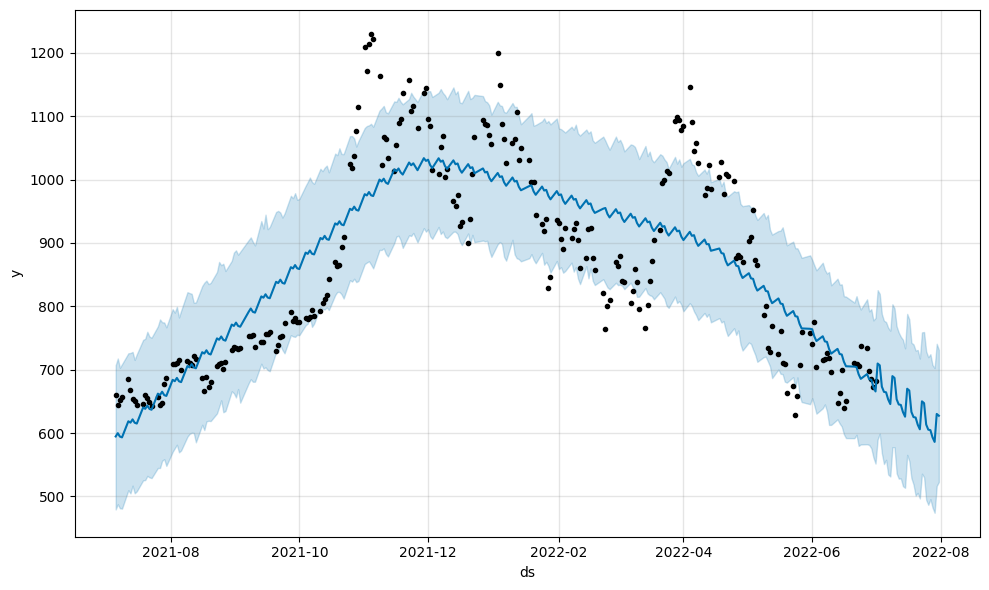

In [24]:
figure=m.plot(forecast,xlabel='ds', ylabel='y')

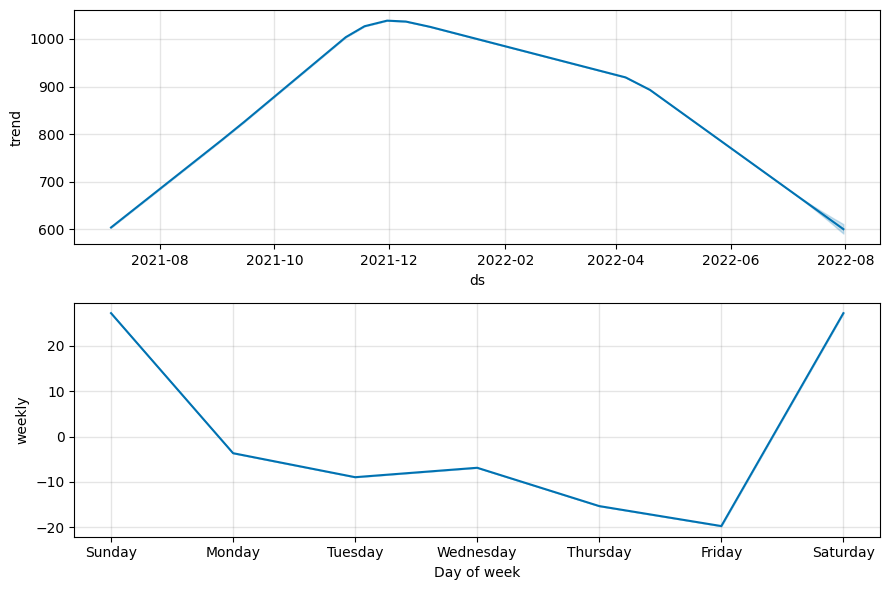

In [25]:
figure2=m.plot_components(forecast)

In [26]:
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>